In [2]:
# Import TensorFlow, a popular machine learning library
import tensorflow as tf 

# Import NumPy, a fundamental package for numerical computations
import numpy as np 

# Print the version of TensorFlow being used
print("TensorFlow version:", tf.__version__)

# Print the version of NumPy being used
print("NumPy version:", np.__version__)

# Import the IMDb dataset from Keras, a high-level API of TensorFlow
from keras.datasets import imdb

# Load the IMDb dataset. 
# The dataset is preprocessed so that only the top 10,000 most frequently occurring words in the dataset are kept.
# 'train_data' and 'test_data' contain the actual movie reviews as lists of integers (each representing a word).
# 'train_labels' and 'test_labels' contain binary labels (0 for negative, 1 for positive sentiment).
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


TensorFlow version: 2.16.2
NumPy version: 1.24.4


In [3]:
# Display the first sample from the training data
# The data corresponds to the input features of the first house in the dataset
>>> train_data[0]

# Display the target value (label) for the first sample
# This is the median value of the house in thousands of dollars
>>> train_labels[0]

1

In [4]:
# This line of code finds the maximum value across all sequences in the 'train_data'

# For each sequence in 'train_data', find the maximum value
# 'sequence' is each individual sequence (array of data points) in 'train_data'
# 'max(sequence)' finds the maximum value in each individual sequence
# '[max(sequence) for sequence in train_data]' creates a list of these maximum values

# The outer 'max' function then finds the overall maximum value from this list of max values
>>> max([max(sequence) for sequence in train_data])


9999

In [5]:
# Retrieve the word index mapping from the IMDb dataset
word_index = imdb.get_word_index()                                    

# Create a reverse mapping from index to word by swapping keys and values
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])            

# Decode the first training review by converting indices back to words
# The -3 accounts for the offset used in the IMDb word index
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])      

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# Import the NumPy library for numerical operations
import numpy as np  

# Define a function to vectorize input sequences
def vectorize_sequences(sequences, dimension=10000):  
    # Initialize a 2D array filled with zeros
    results = np.zeros((len(sequences), dimension))  
    
    # Iterate over each sequence with its index
    for i, sequence in enumerate(sequences):  
        # Set the corresponding indices to 1 to create a one-hot encoding
        results[i, sequence] = 1.  
    
    # Return the resulting vectorized array
    return results  

# Vectorize the training data
x_train = vectorize_sequences(train_data)  

# Vectorize the test data
x_test = vectorize_sequences(test_data)  


In [7]:
# Access the first element of the training dataset
>>> x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
# Convert the training labels to a NumPy array and change the data type to float32
y_train = np.asarray(train_labels).astype('float32')

# Convert the test labels to a NumPy array and change the data type to float32
y_test = np.asarray(test_labels).astype('float32')


In [14]:
# Import the Sequential model class from Keras
from keras.models import Sequential  

# Import Dense and Input layer classes from Keras
from keras.layers import Dense, Input  

# Create a Sequential model
# Instantiate a new Sequential model
model = Sequential()  
# Add an Input layer (you can specify the input shape here)
 # Add an Input layer specifying the input shape as a 1D array of length 10
model.add(Input(shape=(10,))) 

# Add a Dense layer
# Add a Dense layer with 64 units and ReLU activation function
model.add(Dense(64, activation='relu'))  

# Add more layers as needed
# Add a Dense layer with 1 unit and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))  

# Compile the model
# Compile the model with Adam optimizer and binary crossentropy loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  

# Summary of the model
# Print the summary of the model architecture
model.summary()  

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Create a Dense layer with 16 units and ReLU activation function
Dense(16, activation='relu')

<Dense name=dense_5, built=False>

In [21]:
# Import the NumPy library, which is useful for numerical operations and array manipulation
import numpy as np

In [22]:
# Define the ReLU (Rectified Linear Unit) function that takes an input x
def relu(x):
    
    # Return the maximum value between 0 and x, applying the ReLU activation
    return np.maximum(0, x)


In [24]:
# Import the NumPy library for numerical operations
import numpy as np

# Number of features in the input
input_dim = 10  

# Number of neurons in the layer
num_neurons = 5  

# Weights initialized randomly for the layer
W = np.random.rand(num_neurons, input_dim)  

# Bias initialized randomly for each neuron
b = np.random.rand(num_neurons, 1)           


In [25]:
# Example input vector
input = np.random.rand(input_dim, 1)  

In [26]:
# Define the ReLU (Rectified Linear Unit) activation function
def relu(x):
    
    # Return the maximum value between 0 and x, applying ReLU
    return np.maximum(0, x)

# Calculate the output by performing a dot product of weights and input, then adding bias, and applying ReLU
output = relu(np.dot(W, input) + b)


In [27]:
# Importing the models module from Keras
from keras import models

# Importing the layers module from Keras
from keras import layers

# Creating a sequential model, which is a linear stack of layers
model = models.Sequential()

# Adding a dense layer with 16 neurons, ReLU activation, and input shape of 10,000 features
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))

# Adding another dense layer with 16 neurons and ReLU activation
model.add(layers.Dense(16, activation='relu'))

# Adding a final dense layer with 1 neuron and sigmoid activation for binary classification
model.add(layers.Dense(1, activation='sigmoid'))


In [28]:
# Compile the model with specified optimizer, loss function, and evaluation metrics
model.compile(optimizer='rmsprop',
              
              # Use binary cross-entropy loss for binary classification
              loss='binary_crossentropy',
              
              # Track accuracy as a performance metric
              metrics=['accuracy'])

# Add a dense layer with 1 unit and sigmoid activation for binary output
model.add(layers.Dense(1, activation='sigmoid'))


In [30]:
# Import the optimizers module from the Keras library
from keras import optimizers

# Compile the model with specified optimizer, loss function, and metrics

# Use RMSprop optimizer with a learning rate of 0.001
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),  

              # Specify the loss function as binary crossentropy
              loss='binary_crossentropy',  

              # Track accuracy as a performance metric
              metrics=['accuracy']) 


In [32]:
# Importing the necessary modules from Keras for optimization, loss functions, and metrics
from keras import optimizers, losses, metrics

# Compiling the model with specified optimizer, loss function, and metrics

# Using RMSprop optimizer with a learning rate of 0.001
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),  

               # Setting binary cross-entropy as the loss function for binary classification
              loss=losses.binary_crossentropy,            

               # Adding binary accuracy as a metric to evaluate the model's performance
              metrics=[metrics.binary_accuracy])                  

In [33]:
# Select the first 10,000 samples from the training data for validation
x_val = x_train[:10000]

# Create a subset of the training data starting from the 10,001st sample
partial_x_train = x_train[10000:]

# Select the corresponding labels for the first 10,000 samples for validation
y_val = y_train[:10000]

# Create a subset of the training labels starting from the 10,001st sample
partial_y_train = y_train[10000:]

In [34]:
# Compile the model with the specified optimizer, loss function, and metrics
model.compile(optimizer='rmsprop',
              
              # Use binary crossentropy as the loss function for binary classification
              loss='binary_crossentropy',
              
              # Track accuracy as a metric during training
              metrics=['acc'])

# Train the model on the training data with specified parameters
history = model.fit(partial_x_train,
                    
                    # Use the corresponding labels for the training data
                    partial_y_train,
                    
                    # Set the number of epochs for training
                    epochs=20,
                    
                    # Define the batch size for training
                    batch_size=512,
                    
                    # Specify the validation data for evaluating the model's performance
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - acc: 0.6877 - loss: 0.5959 - val_acc: 0.8357 - val_loss: 0.4185
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.8954 - loss: 0.3454 - val_acc: 0.8542 - val_loss: 0.3591
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.9191 - loss: 0.2520 - val_acc: 0.8909 - val_loss: 0.2828
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.9406 - loss: 0.1942 - val_acc: 0.8907 - val_loss: 0.2730
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.9497 - loss: 0.1594 - val_acc: 0.8847 - val_loss: 0.2921
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc: 0.9578 - loss: 0.1389 - val_acc: 0.8876 - val_loss: 0.2827
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc: 0.9672 - loss: 0.1122 - val_acc: 0.8851 - val_loss: 0.2941
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.9765 - loss: 0.0908 - val_acc: 0.8838 - val_loss: 0.3104
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.979

In [35]:
# Retrieve the history of training metrics from the history object
>>> history_dict = history.history

# Get the keys of the history dictionary, which represent the metrics tracked during training
>>> history_dict.keys()

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

In [38]:
# Install the matplotlib library, which is used for plotting and data visualization.
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 31.7 MB/s eta 0:00:0000:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 30.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


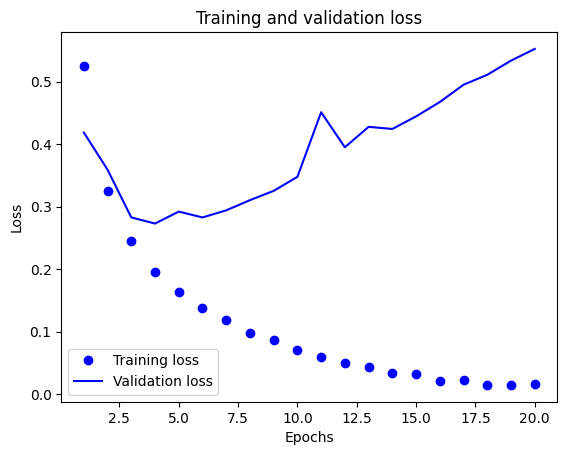

In [39]:
# Import the pyplot module from matplotlib for plotting
import matplotlib.pyplot as plt

# Extract the history of training from the history object
history_dict = history.history

# Get the training loss values from the history dictionary
loss_values = history_dict['loss']

# Get the validation loss values from the history dictionary
val_loss_values = history_dict['val_loss']

# Create a range of epoch numbers from 1 to the number of training loss values
epochs = range(1, len(loss_values) + 1)

# Plot the training loss values against the epoch numbers with blue dots
plt.plot(epochs, loss_values, 'bo', label='Training loss')   

# Plot the validation loss values against the epoch numbers with a blue line
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')      
# Set the title of the plot

plt.title('Training and validation loss')
# Label the x-axis as 'Epochs'
plt.xlabel('Epochs')

# Label the y-axis as 'Loss'
plt.ylabel('Loss')

# Add a legend to differentiate between training and validation loss
plt.legend()

# Display the plot
plt.show()


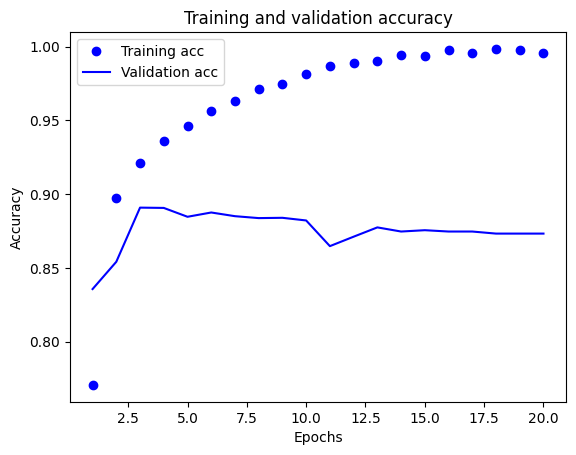

In [41]:
# Clear the current figure to prepare for new plots
plt.clf()                                      

# Extract training accuracy from the history dictionary
acc = history_dict['acc']

# Extract validation accuracy from the history dictionary
val_acc = history_dict['val_acc']

# Plot training accuracy with blue circles
plt.plot(epochs, acc, 'bo', label='Training acc')

# Plot validation accuracy with a blue line
plt.plot(epochs, val_acc, 'b', label='Validation acc')

# Set the title for the accuracy plot
plt.title('Training and validation accuracy')

# Label the x-axis as 'Epochs'
plt.xlabel('Epochs')

# Label the y-axis as 'Accuracy'
plt.ylabel('Accuracy')

# Add a legend to distinguish between training and validation accuracy
plt.legend()

# Display the plot
plt.show()

# Create a range of epochs based on the length of loss values
epochs = range(1, len(loss_values) + 1)

# Plot training loss with blue circles
plt.plot(epochs, loss_values, 'bo', label='Training loss')           

# Plot validation loss with a blue line
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')      

# Set the title for the loss plot
plt.title('Training and validation loss')

# Label the x-axis as 'Epochs'
plt.xlabel('Epochs')

# Label the y-axis as 'Loss'
plt.ylabel('Loss')

# Add a legend to distinguish between training and validation loss
plt.legend()

# Display the plot
plt.show()


In [42]:
# Create a sequential model
model = models.Sequential()

# Add a dense layer with 16 units, ReLU activation, and input shape of 10000
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))

# Add another dense layer with 16 units and ReLU activation
model.add(layers.Dense(16, activation='relu'))

# Add the output layer with 1 unit and sigmoid activation for binary classification
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model with RMSprop optimizer, binary crossentropy loss, and accuracy as a metric
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model on the training data for 4 epochs with a batch size of 512
model.fit(x_train, y_train, epochs=4, batch_size=512)

# Evaluate the model on the test data and store the results
results = model.evaluate(x_test, y_test)

/opt/anaconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7334 - loss: 0.5544
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9025 - loss: 0.2884
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9223 - loss: 0.2160
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9383 - loss: 0.1763
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8779 - loss: 0.2993


In [43]:
# Returns the results
>>> results


[0.29546836018562317, 0.8811600208282471]

In [44]:
# Use the trained model to make predictions on the test dataset
>>> model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.31466994],
       [0.99974155],
       [0.87967366],
       ...,
       [0.13276102],
       [0.12996458],
       [0.7321003 ]], dtype=float32)